<a href="https://colab.research.google.com/github/MinAungThu/ML_Algorithms/blob/main/LinearRegression_CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary packages
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#converting the built-in dataset into pandas dataframe
df = fetch_california_housing(as_frame=True)
df = df.frame

In [ ]:
#a function to initially gain brief overview of the dataset
def initial_analysis(dataframe):
    print(dataframe.info(),
          '\n'+'-'*80,
          '\n\nName of Each Columns\n\n',
          dataframe.columns,
          '\n'+'-'*80,
          '\n\n\033Shape of Dataset\033\n\n',
          dataframe.shape,
          '\n'+'-'*80,
          '\n\nFirst Five Rows\n\n',
          dataframe.head(),
          '\n'+'-'*80,
          '\n\nStatistical Analysis of Each Columns\n\n',
          dataframe.describe(),
          '\n'+'-'*80,
          '\n\nChecking the number of null values in Each Column\n\n',
          dataframe.isnull().sum())

In [ ]:
initial_analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None 
-------------------------------------------------------------------------------- 

Name of Each Columns

 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object') 
-------------------------------------------------------------------------------- 

Shape of Dataset

 (20640, 9) 
-----------

# Exploratory Data Analysis

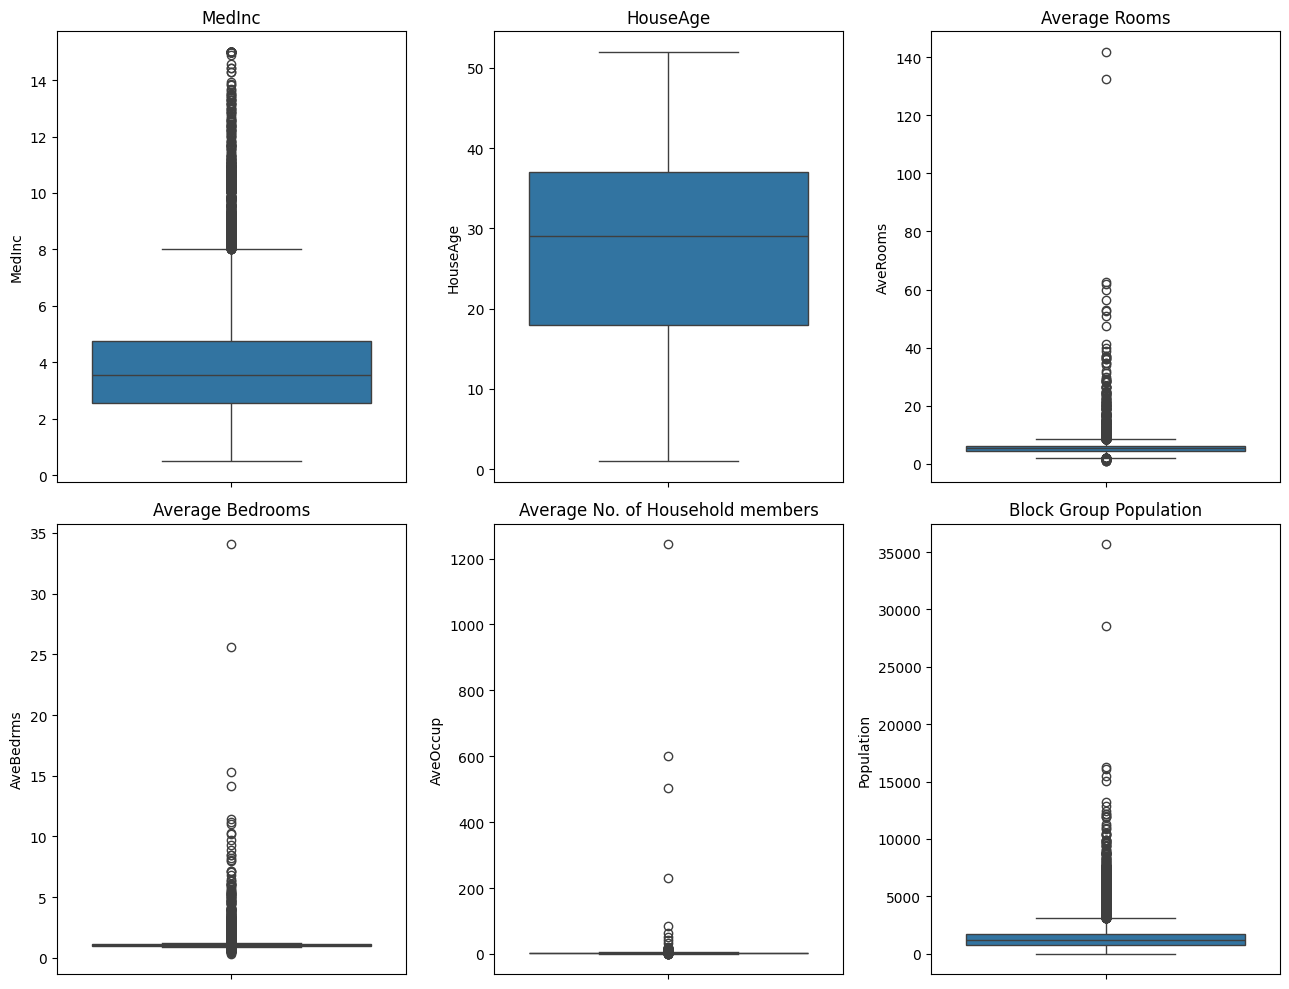

In [ ]:
#Creating box plots to see the data distribution and outliers


fig, ax =plt.subplots(nrows=2,ncols=3,figsize =(13,10))
plt.subplots_adjust(hspace=0.7, wspace=0.4)
sns.boxplot(df.MedInc,ax=ax[0,0])
ax[0,0].set_title("MedInc")
sns.boxplot(df.HouseAge,ax=ax[0,1])
ax[0,1].set_title("HouseAge")
sns.boxplot(df.AveRooms,ax=ax[0,2])
ax[0,2].set_title("Average Rooms")
sns.boxplot(df.AveBedrms,ax=ax[1,0])
ax[1,0].set_title("Average Bedrooms")
sns.boxplot(df.AveOccup,ax=ax[1,1])
ax[1,1].set_title("Average No. of Household members")
sns.boxplot(df.Population,ax=ax[1,2])
ax[1,2].set_title("Block Group Population")

plt.tight_layout()
plt.show()

Although there are certain outliers in the Average Rooms and Average Bedroom columns, we will apply robust scaler in our model training instead of handling the outliers in each column. Considering the overall context of dataset, these outliers in each column have certain relationships, for example, the larger the value of average room, the larger the value of average bedrooms and the average no. of household members and the potential price. Based on this nature, I decided to contain them in the model instead of specifically removing them.

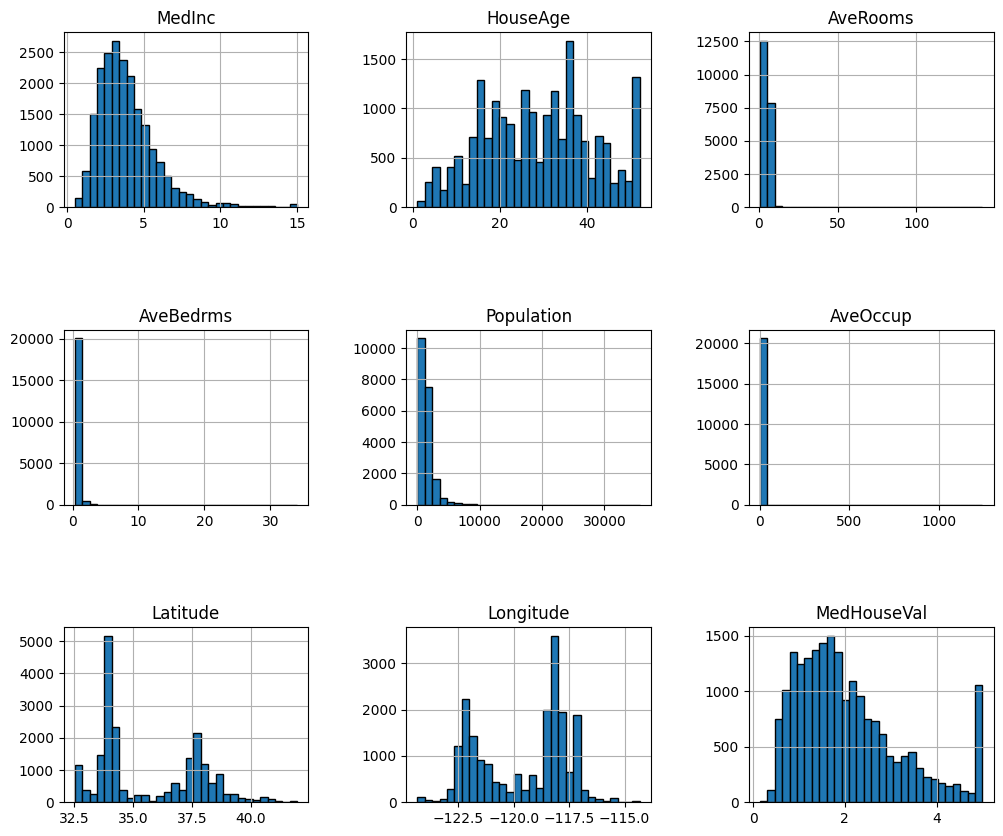

In [ ]:
#Creating Histograms to see the data distribution

df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
#Creating Scatter plot to examine the potential effect of Latitude and Longitude
fig_px = px.scatter(df, x="Latitude", y="Longitude", color="MedHouseVal")
fig_px.show()

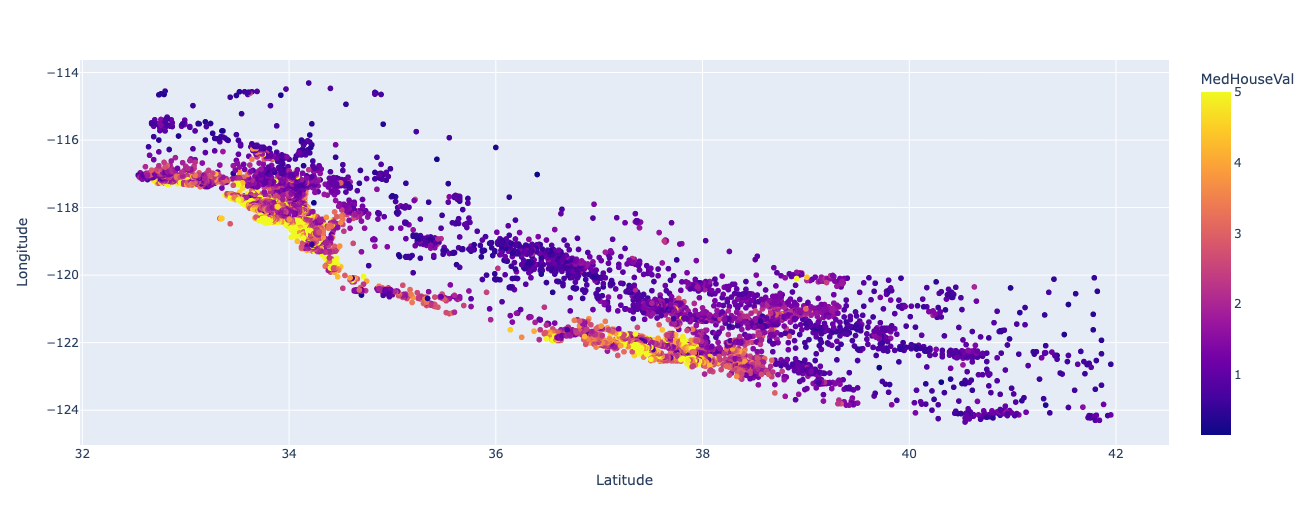

As we can see, there is a specific latitude and longitude locations where the price is quite high. Therefore, we will use latitude and longitude in our model. After initial analysis, we will not make any changes to the original dataset and proceed towards training our model.



In [ ]:
#Heatmap to see the correlationship of each column in the dataset
px.imshow(df.corr(), text_auto=True)

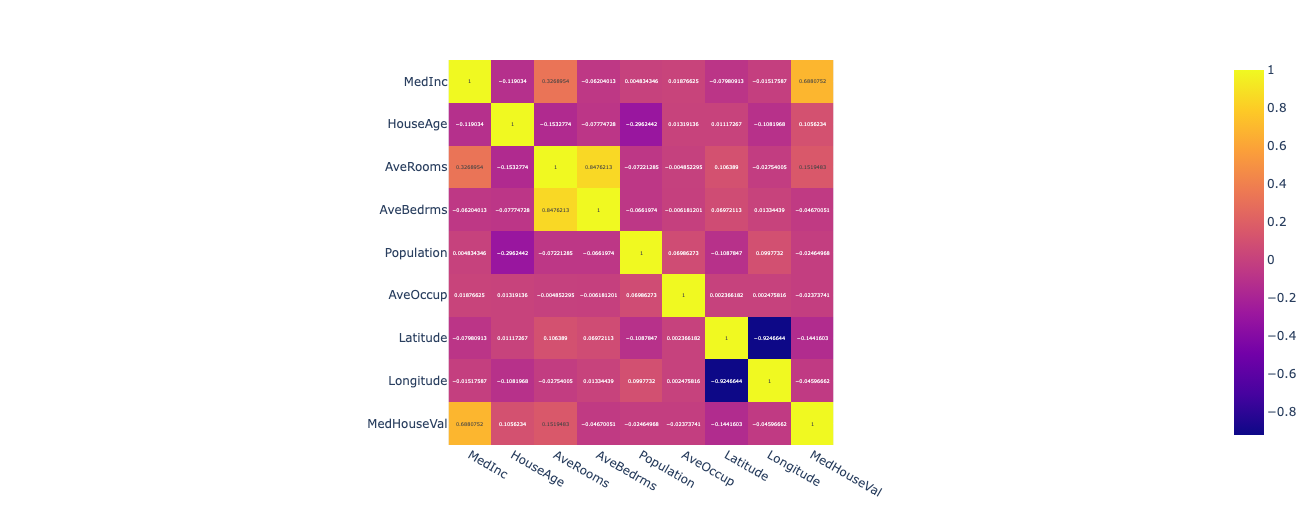As we can see in the interactive heatmap, the correlationship between MedInc and MedHouseVal is strong. House Age and Average Number of rooms also show positive correlationship, so we need to consider these factors.

# Model Training and Evaluation



For the model, I will just use simple linear regression to train the model. I will first apply robustscaler in the dataset to smoothen the overall data spread. The r2 score and Mean Squared Error score show that the model is underfitting. Since the linear regression algorithm from sklearn library is based on ordinary least squares, my analysis is that we should use esemble methods or other gradient-based regression models to further finetune hyperparameters and obtain better evaluation scores.

In [ ]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape,)



Model = Pipeline([('Scaler', RobustScaler()), ('Regressor', LinearRegression())])
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
print("r2 score -> ", r2_score(y_test,y_pred))
print("Mean Squared Error -> ", mean_squared_error(y_test,y_pred))

(16512, 8) (4128, 8) (16512,) (4128,)
r2 score ->  0.6143625790925829
Mean Squared Error ->  0.5129440305793511
